In [1]:
######################
# Datset Importing
# maybe save csv as list of dictionaries

import csv
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from IPython.display import display, HTML
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt




TEST_PATH = r"C:\Users\abhis\OneDrive\Desktop\aps_failure_training_set.csv"
TRAIN_PATH = r"C:\Users\abhis\OneDrive\Desktop\aps_failure_test_set.csv"
PATH = 'dataset/'
SKIPROWS = 20
CLASS_NAMES = ['pos', 'neg']
COLUMNS = ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004',
           'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0',
           'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000',
           'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001',
           'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002',
           'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000',
           'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000',
           'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000',
           'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000',
           'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'co_000',
           'cp_000', 'cq_000', 'cr_000', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007',
           'cs_008', 'cs_009', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000',
           'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'dn_000',
           'do_000', 'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 'dx_000', 'dy_000', 'dz_000',
           'ea_000', 'eb_000', 'ec_00', 'ed_000', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006',
           'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000']
AG = np.array(['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009'])
AY = np.array(['ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009'])
AZ = np.array(['az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009'])
BA = np.array(['ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009'])
CN = np.array(['cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009'])
CS = np.array(['cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009'])
EE = np.array(['ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009'])


#This Method deals with treating the Histogram Data.

def medianHistograms(dataf):
    # is a dataframe...\n",
    #data_set = loadDatasetWithPandas(TRAIN_PATH, SKIPROWS)
    data_set=dataf
    ag_ = data_set[AG]
    ay_ = data_set[AY]
    az_ = data_set[AZ]
    ba_ = data_set[BA]
    cn_ = data_set[CN]
    cs_ = data_set[CS]
    ee_ = data_set[EE]
    
    # create new dataframe for each of the above with the median\n",
    ag_mean = ag_.median(axis=1, skipna=True)
    ay_mean = ay_.median(axis=1, skipna=True)
    az_mean = az_.median(axis=1, skipna=True)
    ba_mean = ba_.median(axis=1, skipna=True)
    cn_mean = cn_.median(axis=1, skipna=True)
    cs_mean = cs_.median(axis=1, skipna=True)
    ee_mean = ee_.median(axis=1, skipna=True)

    remaining_columns = np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.array(COLUMNS), AG), AY), AZ), BA), CN), CS), EE)
    remaining_data = data_set[remaining_columns]
    return pd.concat(
        [
            remaining_data,
            ag_mean.rename('ag_median'),
            ay_mean.rename('ay_median'),
            az_mean.rename('az_median'),
            ba_mean.rename('ba_median'),
            cn_mean.rename('cn_median'),
            cs_mean.rename('cs_median'),
            ee_mean.rename('ee_median')
        ],
        axis=1
    )



#This Method reduces features based the Correlation between the features.
def CorrelationFeatureSelection(X,Y,flag):
    #####Feature Selection with Co-relation####
    # Create correlation matrix
    corr_matrix = X.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    # Drop features
    # newDataFrame = X.drop(X.columns[to_drop], axis=1)
    print("Features to Drop ")
    print(to_drop)

    # Creating the DataFrame with Selected Features.
    if flag == "Train":
        Readydf = ImputedDataFrame[ImputedDataFrame.columns.difference(to_drop)]
        
        
    elif flag == "Test":
        Readydf = ImputedTestDataFrame[ImputedTestDataFrame.columns.difference(to_drop)]
        
    return Readydf


#This Method reduces features selecting the K best features using Chi Square.
#X = feature set, Y = class lable values, FtreNo = No of features to be selected.
def SelectKbest(X,Y,FtreNo,flag):

    #####Feature Extraction with Univariate Statistical Tests####

    # feature extraction
    selector = SelectKBest(score_func=chi2, k=FtreNo)
    fit = selector.fit(X, Y)
    # summarize scores
    np.set_printoptions(precision=3)

    #print("Fit Score")
    #print(fit.scores_)
    features = fit.transform(X)

    # get selected feature names
    Selected_feature_names = X.columns[selector.get_support()]
    print("Selected Feature names: ")
    print(Selected_feature_names)

    #Creating the DataFrame with Selected Features.
    if flag == "Train":
        Readydf = pd.DataFrame(ImputedDataFrame, columns=Selected_feature_names)
    elif flag == "Test":
        Readydf = pd.DataFrame(ImputedTestDataFrame, columns=Selected_feature_names)

    return Readydf



######Feature elimination by low varience####
def lowVarfilterfeatures(DataFrame):
     print("The Std Dev are: ")
     pd.options.display.float_format = '{:.5f}'.format
     #print(preprocessedData)
     print(DataFrame.std())
     #print(DataFrame.std() > 2.90)
     #print(DataFrame.drop(DataFrame.var()[DataFrame.var() > 2.90].index.values, axis=1))





def filterfeatures(DataFrame, FtreSelMthd, FtreNo, flag):

    #array = ImputedDataFrame.values
    #Ftr = array[:, 0:107]
    #ClsLbl = array[:, 107]


    # Seperating the features from the class lable
    X = DataFrame[DataFrame.columns.difference(['class'])]
    Y = pd.DataFrame(DataFrame, columns=['class'])
    

    #Based on the feature selection technique the respective method will be called.
    if FtreSelMthd == "Corelation" :
        FeatureSelected_Df = CorrelationFeatureSelection(X,Y,flag)
    elif FtreSelMthd == "SelectKBest":
        FeatureSelected_Df =SelectKbest(X,Y,FtreNo,flag)

    if flag == "Train":
        print("Final TrainDataFrame is")
    elif flag == "Test":
        print("Final TestDataFrame is")

    return FeatureSelected_Df

    #lowVarfilterfeatures(FeatureSelected_Df)



    #####Feature extraction using RFE[Recursive Feature Elimination]####

   # model = LogisticRegression()
   #rfe = RFE(model, 103)
   # fit = rfe.fit(X, Y)
   # print("Num Features: %d"% fit.n_features_)
   #print("Selected Features: %s"% fit.support_)
   #print("Feature Ranking: %s"% fit.ranking_)




def loadDatasetWithPandas(path, skiprowsNum):
    # Reading the raw data from csv file
    rawData = pd.read_csv(path, skiprows=skiprowsNum)
    #display(rawData)
    # replacing the string indicating missing values with the numpy value for missing values
    NaNProcessedData = rawData.replace({'na': np.nan}, regex=True)
    return NaNProcessedData


def makeDataFrame(trainData):
    df_woLable = pd.DataFrame(trainData, columns=['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
                                                  'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005',
                                                  'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000',
                                                  'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000',
                                                  'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000',
                                                  'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006',
                                                  'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003',
                                                  'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000',
                                                  'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007',
                                                  'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000',
                                                  'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000',
                                                  'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000',
                                                  'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000',
                                                  'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000',
                                                  'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002',
                                                  'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009',
                                                  'co_000', 'cp_000', 'cq_000', 'cr_000', 'cs_000', 'cs_001', 'cs_002',
                                                  'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009',
                                                  'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000',
                                                  'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000',
                                                  'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'dn_000', 'do_000',
                                                  'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000',
                                                  'dx_000', 'dy_000', 'dz_000', 'ea_000', 'eb_000', 'ec_00', 'ed_000',
                                                  'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006',
                                                  'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000'])

    return df_woLable


# Load Datasets
###############################################
# Load Train Dataset
trainData = loadDatasetWithPandas(TRAIN_PATH, SKIPROWS)
testData =  loadDatasetWithPandas(TEST_PATH, SKIPROWS)
#print("Train Data be like: ")
#display(trainData)

#print("Test Data be like: ")
#display(testData)

   
    

#Seperate the class lable from the features fro the training data
dataFrameWithoutlable = makeDataFrame(trainData)
df = pd.DataFrame(trainData)
dfTest = pd.DataFrame(testData)
k = df.nunique()
#display('\n')
#display('The Number of unique values to each feature are: ')
#display(k)

y_train=pd.DataFrame(data=trainData,columns=['class']) 
y_test=pd.DataFrame(data=testData,columns=['class'])


#Treating the Histogram Data.
preprocessedData= medianHistograms(trainData)
preprocessedTestData = medianHistograms(testData)
finalDf = pd.concat([preprocessedData,df[['class']]], axis = 1)
finalTestDf = pd.concat([preprocessedTestData,dfTest[['class']]], axis = 1)
#print("Train Data after preprocessing be like: ")
#display(finalDf)


#print("Test Data after preprocessing be like: ")
#display(finalTestDf)


##Imputation of missing values using Mean Strategy

from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(preprocessedData)
imp.fit(preprocessedTestData)
ImputedDataFrame=pd.DataFrame(imp.transform(preprocessedData), columns = preprocessedData.columns)
ImputedDataFrame = pd.concat([ImputedDataFrame,df[['class']]], axis = 1)


ImputedTestDataFrame=pd.DataFrame(imp.transform(preprocessedTestData), columns = preprocessedData.columns)
ImputedTestDataFrame = pd.concat([ImputedTestDataFrame,dfTest[['class']]], axis = 1)

#print("The Imputed DataFrame")
#print(ImputedDataFrame)

#print("The Imputed TestDataFrame")
#print(ImputedTestDataFrame)

# FtreSelMthd can be "Corelation" or "SelectKBest"
FtreSelMthd = "SelectKBest";
# FtreNo is the number of K best features to be selected.
FtreNo = 100;


#Calling the feature selection method.
#for the training set
TrainDf=filterfeatures(ImputedDataFrame, FtreSelMthd, FtreNo, 'Train')
#for the test set
TestDf=filterfeatures(ImputedDataFrame, FtreSelMthd, FtreNo,'Test')




Selected Feature names: 
Index(['aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_median', 'ah_000',
       'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000',
       'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000',
       'ax_000', 'ay_median', 'az_median', 'ba_median', 'bb_000', 'bc_000',
       'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000',
       'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000',
       'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000',
       'bz_000', 'ca_000', 'cb_000', 'cc_000', 'ce_000', 'cf_000', 'cg_000',
       'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_median', 'co_000',
       'cp_000', 'cq_000', 'cr_000', 'cs_median', 'ct_000', 'cu_000', 'cv_000',
       'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000', 'dd_000',
       'de_000', 'df_000', 'dg_000', 'dh_000', 'di_000', 'dk_000', 'dl_000',
       'dm_000', 'dn_000', 'do_000', 'dp_000'

In [2]:
#Conversion of DataFrames to numpy Array

x_train=TrainDf.values
x_test=TestDf.values

y_train=y_train.values
y_test=y_test.values



In [3]:
print(TrainDf)

          aa_000        ac_000  ad_000  ae_000  af_000  ag_median      ah_000  \
0           60.0  2.000000e+01    12.0     0.0     0.0        0.0      3976.0   
1           82.0  6.800000e+01    40.0     0.0     0.0        0.0      5244.0   
2        66002.0  2.120000e+02   112.0     0.0     0.0    12825.0   1891670.0   
3        59816.0  1.010000e+03   936.0     0.0     0.0    53322.0   1772828.0   
4         1814.0  1.560000e+02   140.0     0.0     0.0        0.0     48978.0   
5          174.0  2.600000e+01    24.0     0.0     0.0        0.0      7396.0   
6        40202.0  6.400000e+02   606.0     0.0     0.0    59528.0   1291194.0   
7       120278.0  2.130706e+09   256.0     0.0     0.0     6968.0   3242508.0   
8        14592.0  2.130706e+09   162.0     0.0     0.0     2434.0    464694.0   
9        28338.0  2.130706e+09   238.0     0.0     0.0     2220.0   1067710.0   
10       30758.0  4.500000e+02   402.0     0.0     0.0     6894.0   1053414.0   
11       40358.0  1.672000e+

In [4]:
print(TestDf)

         aa_000        ac_000  ad_000  ae_000  af_000  ag_median      ah_000  \
0       76698.0  2.130706e+09   280.0     0.0     0.0    12948.0   2551696.0   
1       33058.0  0.000000e+00     0.0     0.0     0.0     9127.0   1393352.0   
2       41040.0  2.280000e+02   100.0     0.0     0.0      824.0   1234132.0   
3          12.0  7.000000e+01    66.0     0.0    10.0        0.0      2668.0   
4       60874.0  1.368000e+03   458.0     0.0     0.0     2294.0   1974038.0   
5       38312.0  2.130706e+09   218.0     0.0     0.0     4894.0   1087760.0   
6          14.0  6.000000e+00     0.0     0.0     0.0        0.0      2094.0   
7      102960.0  2.130706e+09   116.0     0.0     0.0     1503.0   2738458.0   
8       78696.0  0.000000e+00     0.0     0.0     0.0      633.0   3209768.0   
9      153204.0  1.820000e+02     0.0     0.0     0.0        0.0   2658638.0   
10      39196.0  2.040000e+02   170.0     0.0     0.0      302.0   1055746.0   
11      45912.0  0.000000e+00   454.0   

[[58008   992]
 [  463   537]]
             precision    recall  f1-score   support

        neg       0.99      0.98      0.99     59000
        pos       0.35      0.54      0.42      1000

avg / total       0.98      0.98      0.98     60000



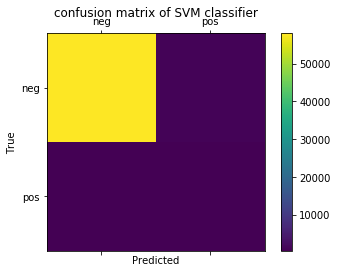

In [5]:
#Implementation of Support vector Machines(Linear)




clf = svm.LinearSVC()

clf.fit(x_train, y_train.ravel())  
y_pred = clf.predict(x_test)  

  

cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)  
print(cr)

labels = ['neg', 'pos']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('confusion matrix of SVM classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()







[[58415   585]
 [  394   606]]
             precision    recall  f1-score   support

        neg       0.99      0.99      0.99     59000
        pos       0.51      0.61      0.55      1000

avg / total       0.99      0.98      0.98     60000



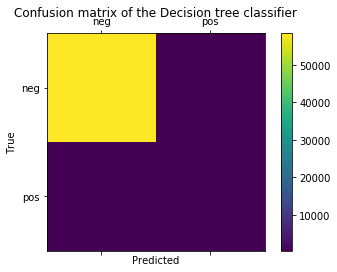

In [6]:

#implementation of Decision Tree
 
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)  


y_pred = classifier.predict(x_test)  




cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)  
print(cr)


labels = ['neg', 'pos']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Decision tree classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

